In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import rasterio as rio
import contextily
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from matplotlib.colors import ListedColormap, rgb2hex
from matplotlib import cm
import plotly.express as px

In [2]:
cat_order = {
    0: "Number of floods",
    1: "Flood area",
    2: "Flood duration",
    3: "Number of floods & flood area",
    4: "Number of floods & flood duration",
    5: "Flood area & flood duration",
    6: "Number of floods, flood area, & flood duration",
    7: "None",
    8: "Not enough information"
}

cat_order_rev = {v: k for k,v in cat_order.items()}

In [3]:
cmap = [[x[0], x[1], x[2], 1] for x in [y for y in plt.get_cmap('Dark2').colors]]

cmap[7] = [0.91, 0.87, 0.84, 0.8]
cmap = np.vstack([cmap, [0.467, 0.533, 0.6, 0.4]])
cmap = ListedColormap(cmap)

In [4]:
df_diff = gpd.read_file('../../Data/granger_results_test_adm2_geom_FDR.gpkg')

In [5]:
cols = ['sig_nfloods', 'sig_flood_dur', 'sig_flood_area']
df_diff['general_sig'] = df_diff[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

In [6]:
df_diff.general_sig.unique()

array(['Not enough information_Not enough information_Not enough information',
       'No_No_No', 'Yes_Yes_Yes', 'No_Yes_No', 'No_No_Yes', 'No_Yes_Yes',
       'Yes_No_No', 'Yes_No_Yes', 'Yes_Yes_No'], dtype=object)

In [7]:
df_diff['general_sig'] = np.where(
    df_diff['general_sig'] == 'Not enough information_Not enough information_Not enough information',
    'Not enough information',
        
        np.where(
        df_diff['general_sig'] == 'No_No_No',
        'None',
        
            np.where(
            df_diff['general_sig'] == 'No_Yes_No',
            'Flood duration',
                
                np.where(
                df_diff['general_sig'] == 'No_No_Yes',
                'Flood area',
                
                    np.where(
                    df_diff['general_sig'] == 'Yes_No_No',
                    'Number of floods',
                        
                        np.where(
                        df_diff['general_sig'] == 'Yes_Yes_No',
                        'Number of floods & flood duration',
                        
                            np.where(
                            df_diff['general_sig'] == 'Yes_No_Yes',
                            'Number of floods & flood area',
                            
                                np.where(
                                df_diff['general_sig'] == 'No_Yes_Yes',
                                'Flood area & flood duration',
                                
                                    np.where(
                                    df_diff['general_sig'] == 'Yes_Yes_Yes',
                                    'Number of floods, flood area, & flood duration', None)))))))))

In [8]:
df_diff['general_sig_ordered'] = df_diff['general_sig'].map(lambda x: cat_order_rev[x])

In [9]:
df_diff_proj = df_diff.to_crs('EPSG:3857')

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
df_diff_proj[df_diff_proj['p-value_nfloods'].notna()]

,Name,ADMIN1,ADMIN2,FIDcalc,p-value_nfloods,p-value_flood_dur,p-value_flood_area,sig_nfloods,sig_flood_dur,sig_flood_area,geometry,general_sig,general_sig_ordered
62,Burkina Faso,Est,Gnagna,10595.0,9.809196e-01,0.934883,0.947851,No,No,No,"MULTIPOLYGON (((6913.079 1525737.866, 7177.279...",None,7
64,Burkina Faso,Est,Gourma,10597.0,9.959881e-01,0.985793,0.984017,No,No,No,"MULTIPOLYGON (((-9683.540 1377620.491, -9683.1...",None,7
65,Burkina Faso,Est,Gourma,10598.0,9.996750e-01,0.998604,0.994052,No,No,No,"MULTIPOLYGON (((138562.415 1433492.865, 138721...",None,7
66,Burkina Faso,Est,Komondjari,10688.0,6.715306e-01,0.746977,0.865456,No,No,No,"MULTIPOLYGON (((109893.407 1469427.145, 109983...",None,7
67,Burkina Faso,Est,Komondjari,10689.0,6.352134e-01,0.761583,0.873603,No,No,No,"MULTIPOLYGON (((146660.001 1441279.958, 146557...",None,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,Uganda,Northern,Yumbe,2928.0,9.770694e-01,0.969638,0.999456,No,No,No,"MULTIPOLYGON (((3510264.126 407296.366, 351021...",None,7
5707,Uganda,Northern,Yumbe,2929.0,9.945247e-01,0.992780,0.980050,No,No,No,"MULTIPOLYGON (((3475343.916 369471.184, 347534...",None,7
5792,Uganda,Western,Kiryandongo,3014.0,9.852763e-01,0.999829,0.984694,No,No,No,"MULTIPOLYGON (((3544110.873 263467.508, 354424...",None,7
5794,Uganda,Western,Kiryandongo,3016.0,9.848045e-01,0.999787,0.982998,No,No,No,"MULTIPOLYGON (((3536268.839 221265.129, 353627...",None,7


In [11]:
data_dir = "../../Data/"
shp_dir = os.path.join(data_dir, 'ADM shapefiles/')

country_names = sorted(['TCD', 'MLI', 'NER', 'NGA', 'MRT', 'BFA', 'SDN', 'SSD',
                        'ETH', 'UGA', 'KEN', 'SOM', 'ZMB', 'ZWE', 'MOZ', 'MWI'])
country_shapes = {}

for c in range(len(country_names)):
    d = gpd.read_file(os.path.join(shp_dir, '{}_adm/{}_adm0.shp'.format(country_names[c], country_names[c])))
    country_shapes[c] = d

country_df = pd.concat(country_shapes.values(), ignore_index = True)

country_df = country_df.drop(['ISO3', 'NAME_ENGLI',
   'NAME_ISO', 'NAME_FAO', 'NAME_LOCAL', 'NAME_OBSOL', 'NAME_VARIA',
   'NAME_NONLA', 'NAME_FRENC', 'NAME_SPANI', 'NAME_RUSSI',
   'NAME_ARABI', 'NAME_CHINE', 'WASPARTOF', 'CONTAINS', 'SOVEREIGN',
   'ISO2', 'WWW', 'FIPS', 'ISON', 'VALIDFR', 'VALIDTO', 'UNREGION1', 'UNREGION2', 'DEVELOPING', 'CIS',
   'Transition', 'OECD', 'WBREGION', 'WBINCOME', 'WBDEBT', 'WBOTHER',
   'CEEAC', 'CEMAC', 'CEPLG', 'COMESA', 'EAC', 'ECOWAS', 'IGAD',
   'IOC', 'MRU', 'SACU', 'UEMOA', 'UMA', 'PALOP', 'PARTA', 'CACM',
   'EurAsEC', 'Agadir', 'SAARC', 'ASEAN', 'NAFTA', 'GCC', 'CSN',
   'CARICOM', 'EU', 'CAN', 'ACP', 'Landlocked', 'AOSIS', 'SIDS',
   'Islands', 'LDC',], 1)

country_df.loc[country_df['NAME_0'] == 'South Sudan', 'ID_0'] = 222
country_df.loc[country_df['NAME_0'] == 'South Sudan', 'ISO'] = 'SSD'
country_df = country_df.to_crs('EPSG:3857')

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


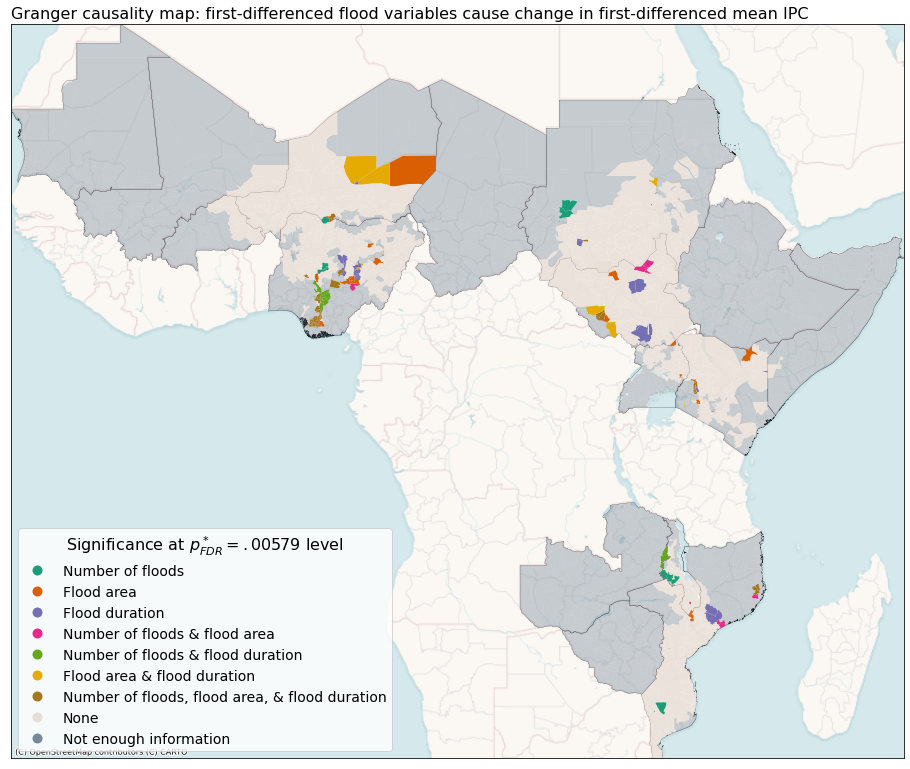

In [12]:
plt.figure(figsize = (16,16))
ax = plt.gca()
df_diff_proj.plot(ax = ax, linewidth = 1, column = 'general_sig_ordered', cmap = cmap, categorical = True,
                  zorder=3,
                  legend = True,
                  legend_kwds = {'title': r'Significance at $p_{FDR}^*=.00579$ level',
                                 'title_fontsize': 16,
                                'loc': 'lower left',
                                'fontsize': 14})

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2, zorder = 2)
# df_rivers_proj.plot(ax=ax, color = 'blue', linewidth = 0.2, zorder=1)

plt.axis(df_diff_proj.total_bounds[[0,2,1,3]])
plt.title('Granger causality map: first-differenced flood variables cause change in first-differenced mean IPC', fontsize = 16, loc = 'left')

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), cat_order)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

contextily.add_basemap(ax, source = contextily.providers.CartoDB.VoyagerNoLabels)

## Make bar chart

In [21]:
df_pop = gpd.read_file(os.path.join("../../Data", "IPC", "LZ_adm2_geometryFix_population.gpkg"))

In [22]:
df_pop = df_pop.rename(columns = {'ADMIN0': 'Name'})

In [23]:
df_diff_pop = pd.merge(df_diff, df_pop, on = ['Name', 'ADMIN1', 'ADMIN2', 'FIDcalc'], how = 'left')

In [28]:
df_plot = df_diff_pop.loc[df_diff_pop['general_sig'] != "Not enough information"].groupby('general_sig')\
                     .agg({'2020_pop': 'sum'}).reset_index()

df_plot['food_insecure'] = df_plot.loc[:, '2020_pop'] * .20

df_plot['sig_group'] = df_plot['general_sig'].map(lambda x: "No" if x == 'None' else "Yes")

fig = px.bar(
    df_plot,
    x = 'sig_group',
    y = 'food_insecure',
    color = 'general_sig',
    category_orders = {'general_sig': ['Number of floods', 'Flood area', 'Flood duration',
                                      'Number of floods & flood area', 'Number of floods & flood duration',
                                      'Flood area & flood duration', 'Number of floods, flood area, & flood duration',
                                      'None']},
    color_discrete_sequence=[rgb2hex(c) for c in cmap.colors],
    labels={'food_insecure': 'Population having experienced food insecurity',
           'general_sig': 'Flood effect category',
           'sig_group': 'Regional food security significantly affected by floods'},
    template = "plotly_white"
)

fig.update_layout(showlegend=True)
fig.show()

Raw population numbers corresponding to plotted categories:

In [28]:
df_plot.groupby('sig_group')['2020_pop'].sum()

sig_group
No     2.075853e+08
Yes    2.835829e+07
Name: 2020_pop, dtype: float64

... and as fractions:

In [18]:
df_plot.groupby('sig_group')['2020_pop'].apply(lambda x: x.sum() / df_plot['2020_pop'].sum())

sig_group
No     0.879809
Yes    0.120191
Name: 2020_pop, dtype: float64

Compare against population in food insecure regions

In [20]:
full_data = gpd.read_file(os.path.join(data_dir, "flood_ipc_seasonal_adm2_timeseries_precip.gpkg"))
df_pop = df_pop.drop('geometry', axis = 1)
full_data = pd.merge(full_data, df_pop, on = ['FNID', 'EFF_YEAR', 'COUNTRY', 'Name', 'ADMIN1',
                                             'ADMIN2', 'ALIASES', 'LZcode_fin', 'FIDcalc'],
                    how = 'left')

Proxy for population having experienced any fluctuations in food security over the study period:

In [27]:
full_data[full_data['mean_ipc'] > 1.0].groupby('FIDcalc')['2020_pop'].mean().sum() * .20

141832951.08420587

In [26]:
full_data.groupby('FIDcalc')['2020_pop'].mean().sum()

761576584.2699127

In [ ]:
full_data_granger = pd.merge(full_data, df_diff_pop, on = ['Name', 'ADMIN1', 'ADMIN2', 'FIDcalc'],
                            how = 'left')
full_data_granger = full_data_granger.loc[full_data_granger['general_sig'] != "Not enough information"]

In [36]:
full_data_granger.loc[full_data_granger['mean_ipc'] > 1.0].groupby('FIDcalc')['2020_pop_x'].mean().sum() *.20

47188714.089816764

In [33]:
full_data_granger

,level_0,index,FNID_x,EFF_YEAR_x,COUNTRY_x,Name,ADMIN1,ADMIN2,ALIASES_x,LZcode_fin_x,...,geometry_x,general_sig,general_sig_ordered,FNID_y,EFF_YEAR_y,COUNTRY_y,ALIASES_y,LZcode_fin_y,2020_pop_y,geometry_y
2418,228721,10594,BF2001A20801,2001,BF,Burkina Faso,Est,Gnagna,None,2,...,"MULTIPOLYGON (((0.06210 13.57706, 0.06447 13.5...",None,7,BF2001A20801,2001.0,BF,None,2,624362.12500,"POLYGON ((0.06210 13.57706, 0.06447 13.57497, ..."
2419,228722,10594,BF2001A20801,2001,BF,Burkina Faso,Est,Gnagna,None,2,...,"MULTIPOLYGON (((0.06210 13.57706, 0.06447 13.5...",None,7,BF2001A20801,2001.0,BF,None,2,624362.12500,"POLYGON ((0.06210 13.57706, 0.06447 13.57497, ..."
2420,228723,10594,BF2001A20801,2001,BF,Burkina Faso,Est,Gnagna,None,2,...,"MULTIPOLYGON (((0.06210 13.57706, 0.06447 13.5...",None,7,BF2001A20801,2001.0,BF,None,2,624362.12500,"POLYGON ((0.06210 13.57706, 0.06447 13.57497, ..."
2421,228724,10594,BF2001A20801,2001,BF,Burkina Faso,Est,Gnagna,None,2,...,"MULTIPOLYGON (((0.06210 13.57706, 0.06447 13.5...",None,7,BF2001A20801,2001.0,BF,None,2,624362.12500,"POLYGON ((0.06210 13.57706, 0.06447 13.57497, ..."
2422,228725,10594,BF2001A20801,2001,BF,Burkina Faso,Est,Gnagna,None,2,...,"MULTIPOLYGON (((0.06210 13.57706, 0.06447 13.5...",None,7,BF2001A20801,2001.0,BF,None,2,624362.12500,"POLYGON ((0.06210 13.57706, 0.06447 13.57497, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230915,4715,990,ZM2012A20304,2012,ZM,Zambia,Eastern,Lundazi,None,3,...,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -...",Number of floods & flood duration,4,ZM2012A20304,2012.0,ZM,None,3,389489.96875,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -..."
230916,4716,990,ZM2012A20304,2012,ZM,Zambia,Eastern,Lundazi,None,3,...,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -...",Number of floods & flood duration,4,ZM2012A20304,2012.0,ZM,None,3,389489.96875,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -..."
230917,4717,990,ZM2012A20304,2012,ZM,Zambia,Eastern,Lundazi,None,3,...,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -...",Number of floods & flood duration,4,ZM2012A20304,2012.0,ZM,None,3,389489.96875,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -..."
230918,4718,990,ZM2012A20304,2012,ZM,Zambia,Eastern,Lundazi,None,3,...,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -...",Number of floods & flood duration,4,ZM2012A20304,2012.0,ZM,None,3,389489.96875,"MULTIPOLYGON (((33.30960 -11.59400, 33.31107 -..."
